In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [2]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
0        2023-12-25       0   ST-1718   ST-2047      1        7      1363
1        2023-12-25       0   ST-2040   ST-1351      1        5       756
2        2023-12-25       0    ST-528    ST-518      1       14      2086
3        2023-12-25       0   ST-2031   ST-2965      1        9      1578
4        2023-12-25       0    ST-829   ST-2054      1       34      2680
...             ...     ...       ...       ...    ...      ...       ...
1772057  2024-01-16    2345    ST-525   ST-2481      1        3       600
1772058  2024-01-16    2345    ST-834    ST-528      1       11      2267
1772059  2024-01-16    2350   ST-1352   ST-1676      1        6       845
1772060  2024-01-16    2350   ST-2994    ST-517      1        3       448
1772061  2024-01-16    2350    ST-513   ST-2482      1        3       710

[1772062 rows x 7 columns]


In [3]:
print(강서_데이터.info())
print(강서_대여소_ID.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772062 entries, 0 to 1772061
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   기준_날짜      object
 1   기준_시간대     int64 
 2   시작_대여소_ID  object
 3   종료_대여소_ID  object
 4   전체_건수      int64 
 5   전체_이용_분    int64 
 6   전체_이용_거리   int64 
dtypes: int64(4), object(3)
memory usage: 94.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  224 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB
None


# 일별 대여데이터 시각화

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3

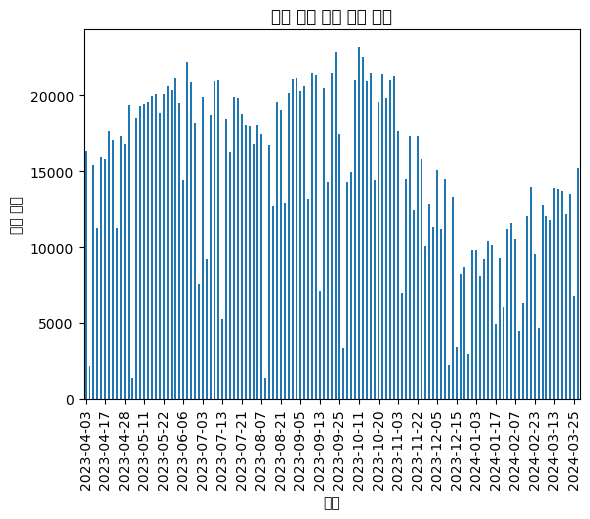

In [4]:
일별_데이터 = 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

눈금_간격 = 5  # 예시로 눈금 간격을 5로 설정
눈금_위치 = range(0, len(일별_데이터.index), 눈금_간격)
눈금_레이블 = 일별_데이터.index[::눈금_간격]

# 시작 대여소별 대여 건수 시각화
일별_데이터.plot(kind='bar')
plt.title('강서 지역 일별 대여 건수')
plt.xlabel('날짜')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.xticks(눈금_위치, 눈금_레이블, rotation=90)
plt.show()




# 시간별 데이터 시각화

In [5]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00'
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00'
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()

print(강서_시간대별_건수)

시간대_구간
00:00~06:00     85029
06:00~10:00    486802
10:00~17:00    383566
17:00~21:00    609095
20:00~24:00    317710
Name: 전체_건수, dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\L

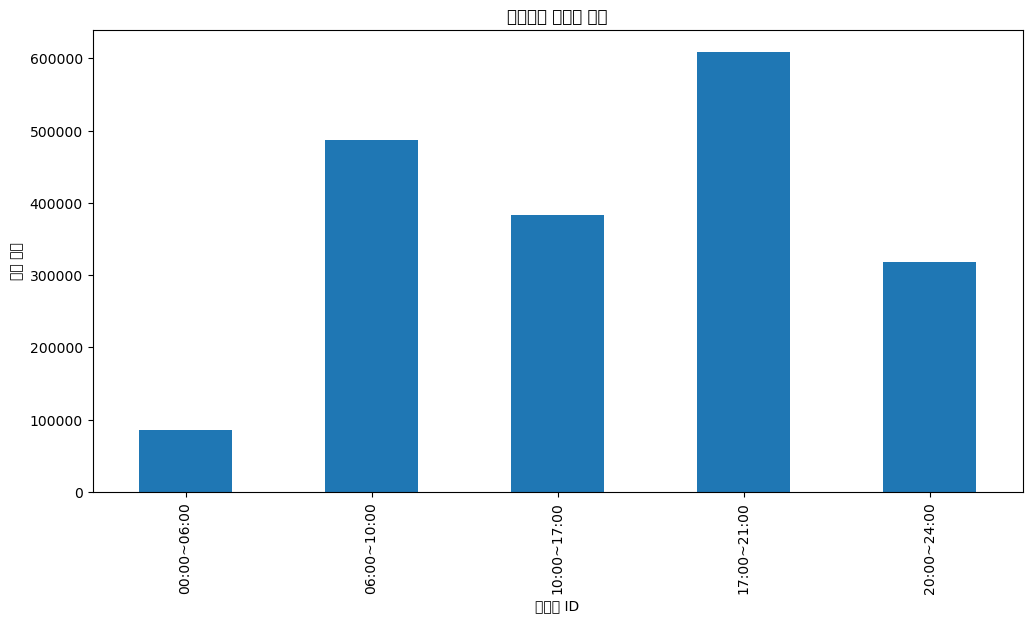

In [6]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 1시간 단위로 시간 묶기

In [21]:
def divide_time_range(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum()

print(강서_시간대별_건수)

한시간_구간
00:00~01:00     25994
01:00~02:00     15074
02:00~03:00      9478
03:00~04:00      6476
04:00~05:00      7339
05:00~06:00     20668
06:00~07:00     59841
07:00~08:00    140876
08:00~09:00    202225
09:00~10:00     83860
10:00~11:00     52434
11:00~12:00     64972
12:00~13:00     67940
13:00~14:00     62144
14:00~15:00     61377
15:00~16:00     74699
16:00~17:00    101950
17:00~18:00    160558
18:00~19:00    209064
19:00~20:00    137523
20:00~21:00    109287
21:00~22:00     95276
22:00~23:00     76173
23:00~24:00     36974
Name: 전체_건수, dtype: int64


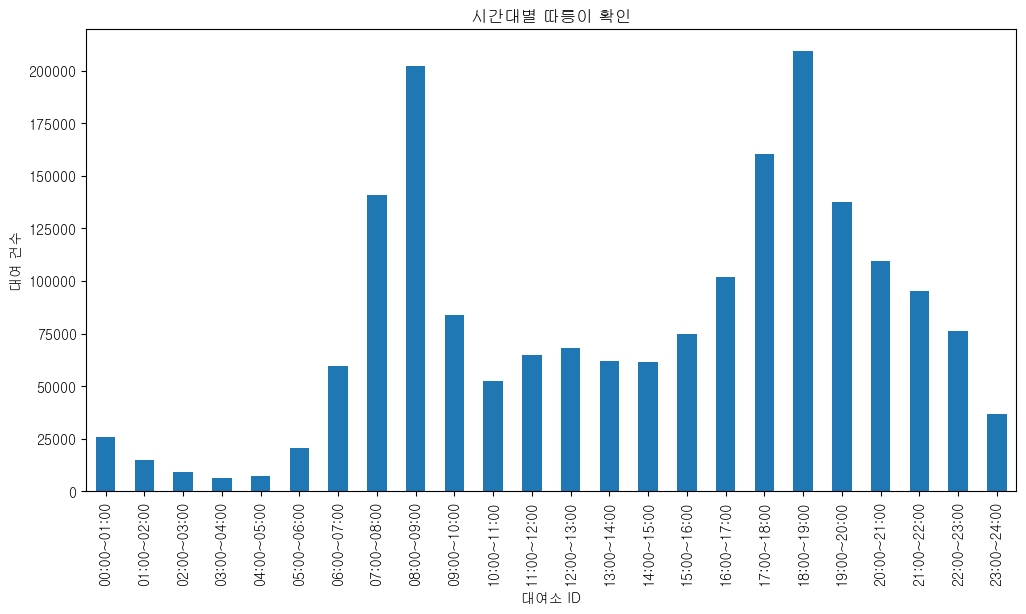

In [22]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

# 요일 별 비교

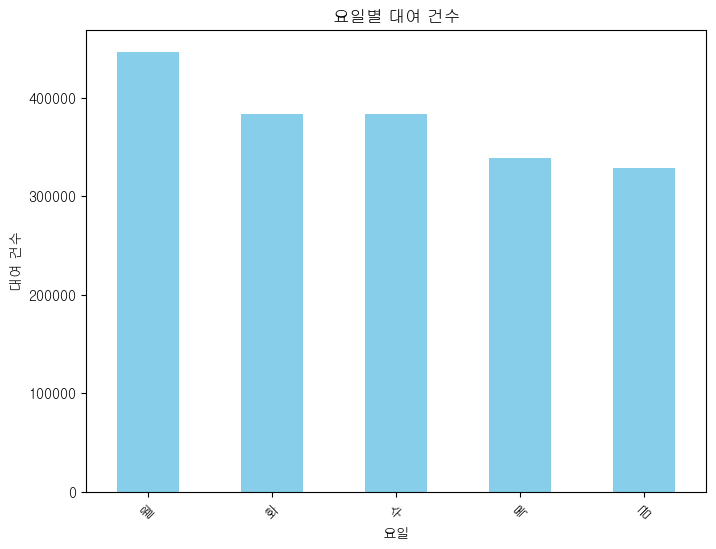

In [38]:

import matplotlib.pyplot as plt
import pandas as pd

# 기준_날짜 열을 날짜 형식으로 변환
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])

# 기준_날짜 열에서 요일을 추출하여 새로운 열 추가
강서_데이터['요일'] = 강서_데이터['기준_날짜'].dt.day_name()
# 영어 요일명을 한글 요일명으로 변환하는 사전 생성
영어_한글_요일_매핑 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',

}

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['요일'] = 강서_데이터['요일'].map(영어_한글_요일_매핑)

# 요일별 전체 건수 통계 계산
요일별_통계 = 강서_데이터.groupby('요일')['전체_건수'].sum()

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
요일별_통계[요일_순서].plot(kind='bar', color='skyblue')
plt.title('요일별 대여 건수')
plt.xlabel('요일')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [34]:
# 데이터프레임의 일부를 출력하여 확인
print(강서_데이터.head())

       기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  \
0 2023-12-25       0   ST-1718   ST-2047      1        7      1363   
1 2023-12-25       0   ST-2040   ST-1351      1        5       756   
2 2023-12-25       0    ST-528    ST-518      1       14      2086   
3 2023-12-25       0   ST-2031   ST-2965      1        9      1578   
4 2023-12-25       0    ST-829   ST-2054      1       34      2680   

        시간대_구간       한시간_구간      요일  
0  00:00~06:00  00:00~01:00  Monday  
1  00:00~06:00  00:00~01:00  Monday  
2  00:00~06:00  00:00~01:00  Monday  
3  00:00~06:00  00:00~01:00  Monday  
4  00:00~06:00  00:00~01:00  Monday  


# 대여소 별 대여, 반납 비교

In [23]:
import matplotlib.pyplot as plt

# 시작 대여소별 전체 횟수 계산
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()



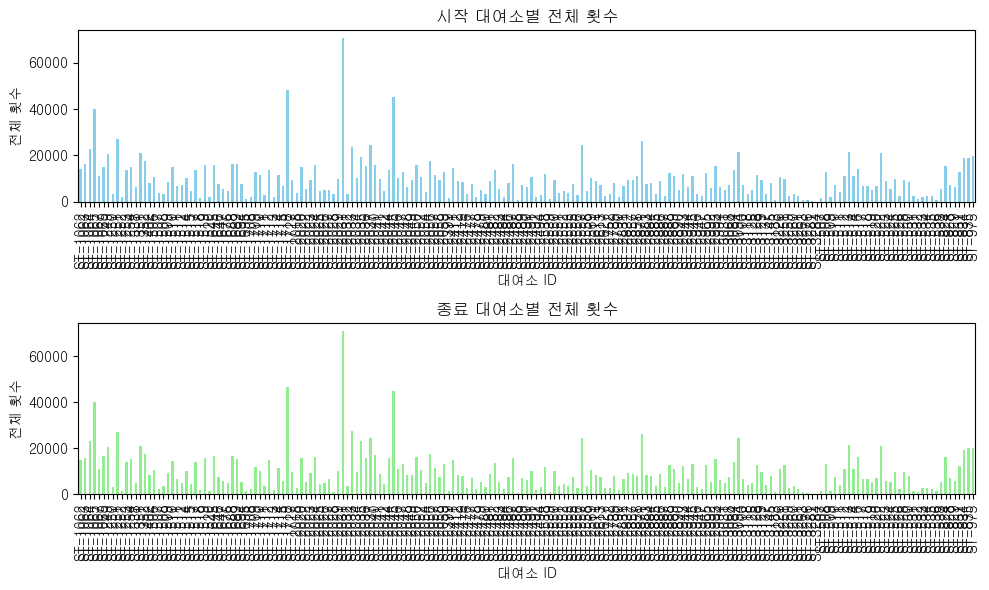

In [24]:
import matplotlib as mpl
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)
# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 시작 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 1)
시작대여소별_전체횟수.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

# 종료 대여소별 전체 횟수 막대 그래프
plt.subplot(2, 1, 2)
종료대여소별_전체횟수.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

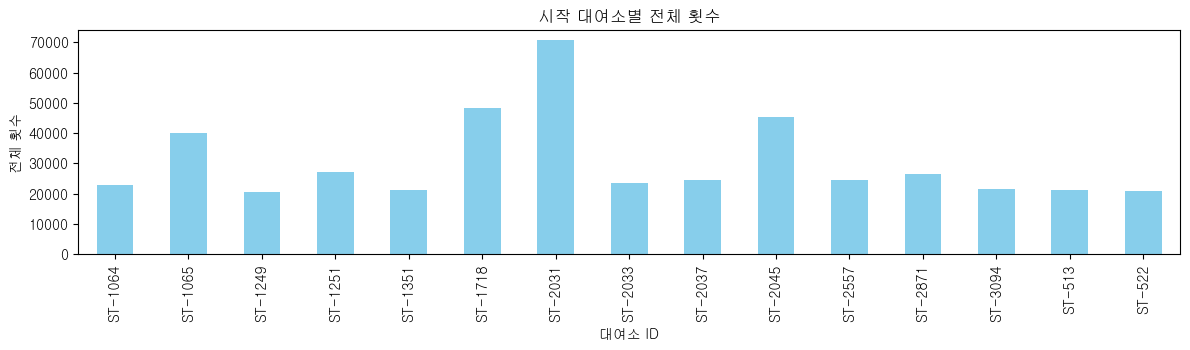

In [19]:
시작대여소_2= 시작대여소별_전체횟수[시작대여소별_전체횟수.values >= 20000]
종료대여소_2 = 종료대여소별_전체횟수[종료대여소별_전체횟수.values >= 20000]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 시작 대여소별 2만개 이상
plt.subplot(2, 1, 1)
시작대여소_2.plot(kind='bar', color='skyblue')
plt.title('시작 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

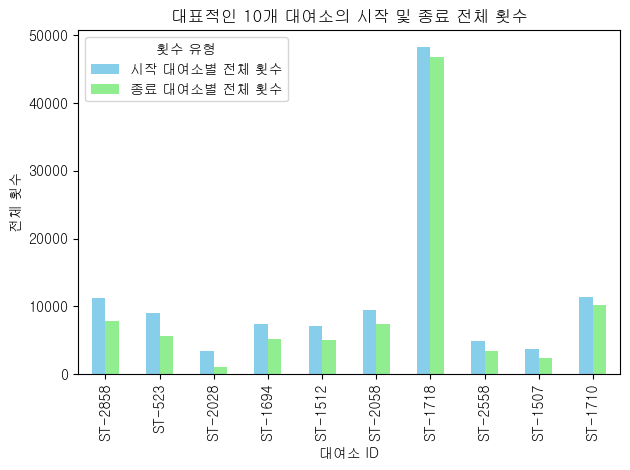

In [28]:
# 시작 대여소별 전체 횟수와 종료 대여소별 전체 횟수를 하나의 데이터프레임으로 병합
merged_data = pd.merge(시작대여소별_전체횟수, 종료대여소별_전체횟수, left_index=True, right_index=True, how='outer')

# 대여소 ID를 인덱스로 설정
merged_data.index.name = '대여소 ID'

# 시작 대여소별과 종료 대여소별 전체 횟수를 가지는 새로운 데이터프레임 생성
merged_data.columns = ['시작 대여소별 전체 횟수', '종료 대여소별 전체 횟수']

# 시작 대여소와 종료 대여소 간의 차이가 큰 상위 10개의 대여소 선택
상위10대여소 = (merged_data['시작 대여소별 전체 횟수'] - merged_data['종료 대여소별 전체 횟수']).nlargest(10).index

# 대표 10개 대여소에 해당하는 데이터 추출
대표10대여소_데이터 = merged_data.loc[상위10대여소]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# 대표 10개 대여소에 대한 시작 및 종료 대여소별 전체 횟수 막대 그래프
대표10대여소_데이터.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('대표적인 10개 대여소의 시작 및 종료 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)
plt.legend(title='횟수 유형')

plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'ST-1064'),
  Text(1, 0, 'ST-1065'),
  Text(2, 0, 'ST-1249'),
  Text(3, 0, 'ST-1251'),
  Text(4, 0, 'ST-1351'),
  Text(5, 0, 'ST-1718'),
  Text(6, 0, 'ST-2031'),
  Text(7, 0, 'ST-2033'),
  Text(8, 0, 'ST-2035'),
  Text(9, 0, 'ST-2037'),
  Text(10, 0, 'ST-2045'),
  Text(11, 0, 'ST-2557'),
  Text(12, 0, 'ST-2871'),
  Text(13, 0, 'ST-3094'),
  Text(14, 0, 'ST-513'),
  Text(15, 0, 'ST-522'),
  Text(16, 0, 'ST-835')])

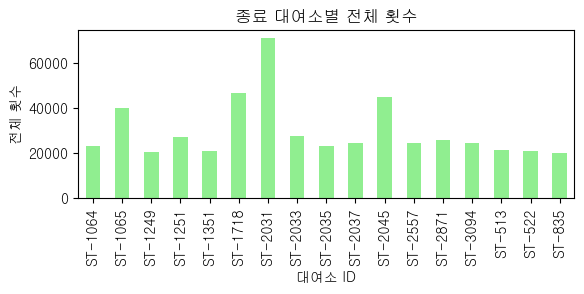

In [20]:
# 종료 대여소 2만개 이상
plt.subplot(2, 1, 2)
종료대여소_2.plot(kind='bar', color='lightgreen')
plt.title('종료 대여소별 전체 횟수')
plt.xlabel('대여소 ID')
plt.ylabel('전체 횟수')
plt.xticks(rotation=90)

In [14]:
print(강서_데이터)

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  \
0        2023-12-25       0   ST-1718   ST-2047      1        7      1363   
1        2023-12-25       0   ST-2040   ST-1351      1        5       756   
2        2023-12-25       0    ST-528    ST-518      1       14      2086   
3        2023-12-25       0   ST-2031   ST-2965      1        9      1578   
4        2023-12-25       0    ST-829   ST-2054      1       34      2680   
...             ...     ...       ...       ...    ...      ...       ...   
1772057  2024-01-16    2345    ST-525   ST-2481      1        3       600   
1772058  2024-01-16    2345    ST-834    ST-528      1       11      2267   
1772059  2024-01-16    2350   ST-1352   ST-1676      1        6       845   
1772060  2024-01-16    2350   ST-2994    ST-517      1        3       448   
1772061  2024-01-16    2350    ST-513   ST-2482      1        3       710   

              시간대_구간       한시간_구간  
0        00:00~06:00  00:00~01:00  
1  

# 대여소별 대여, 반납량 csv파일 만들기

In [15]:
대여소별_사용량 = pd.DataFrame({
    '대여소_ID': 시작대여소별_전체횟수.index,
    '대여_횟수': 시작대여소별_전체횟수.values,
    '반납_횟수': 종료대여소별_전체횟수.values
})

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [16]:
대여소별_사용량.to_csv('대여소별_대여_반납량.csv',index=False)

# ======== 테스트 ========

In [83]:
하루치만 = 강서_데이터[강서_데이터['기준_날짜']=='2023-02-13']

In [85]:
print(하루치만)

            기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일  \
0      2023-02-13     150   ST-1517   ST-1517      1        1        50   0   
1      2023-02-13     835   ST-1718   ST-1718      1        1        10   0   
2      2023-02-13    1250   ST-2028   ST-2028      1        1        20   0   
3      2023-02-13    1815   ST-1506   ST-1506      1        1        10   0   
4      2023-02-13    1845   ST-2045   ST-2045      1        1        20   0   
...           ...     ...       ...       ...    ...      ...       ...  ..   
19061  2023-02-13    1710   ST-1712   ST-1065      4       16      2952   0   
19062  2023-02-13    1745   ST-1711   ST-2045      4       21      4268   0   
19063  2023-02-13    1810   ST-2033   ST-2045      4       17      3218   0   
19064  2023-02-13     810   ST-1718   ST-1711      5       24      4580   0   
19065  2023-02-13     815   ST-1718   ST-1711      5       24      4580   0   

            시간대_구간       한시간_구간  
0      00:00~06:0

In [107]:
하루치만_대여소 = 하루치만[(하루치만['시작_대여소_ID'] == 'ST-511') | (하루치만['종료_대여소_ID'] == 'ST-511')]

In [102]:
하루치만_대여소_sum1 = 하루치만_대여소.groupby('시작_대여소_ID')['전체_건수'].sum()
하루치만_대여소_sum2 = 하루치만_대여소.groupby('종료_대여소_ID')['전체_건수'].sum()

print(하루치만_대여소_sum1)


시작_대여소_ID
ST-1254     2
ST-1402     2
ST-1647     6
ST-1710     2
ST-2411     2
ST-2627    24
ST-2832     2
ST-2947     8
ST-510      2
ST-511      2
ST-536      2
ST-824      2
Name: 전체_건수, dtype: int64


In [103]:
print(하루치만_대여소_sum2)


종료_대여소_ID
ST-1254     2
ST-1517     2
ST-1647     4
ST-1710     2
ST-2411     2
ST-2627    34
ST-2992     2
ST-3145     2
ST-508      2
ST-511      2
ST-536      2
Name: 전체_건수, dtype: int64


In [113]:
하루치만_대여소 = 하루치만_대여소.sort_values(by=['종료_대여소_ID', '전체_이용_분'])

In [114]:
print(하루치만_대여소)

            기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리  요일  \
925    2023-02-13     735    ST-511   ST-1062      1        1       220   0   
10019  2023-02-13     735    ST-511   ST-1062      1        1       220   0   
4091   2023-02-13    1420    ST-511   ST-1249      1       42      4690   0   
13464  2023-02-13    1505    ST-511   ST-1249      1       42      4690   0   
2153   2023-02-13     900    ST-511   ST-1254      1        7      1690   0   
11316  2023-02-13     905    ST-511   ST-1254      1        7      1690   0   
459    2023-02-13     620    ST-511   ST-1254      1        7      1258   0   
9650   2023-02-13     630    ST-511   ST-1254      1        7      1258   0   
9666   2023-02-13     635    ST-511   ST-1517      1       10      2033   0   
479    2023-02-13     625    ST-511   ST-1517      1       10      2033   0   
16698  2023-02-13    1945    ST-511   ST-1645      1        7       887   0   
13495  2023-02-13    1510    ST-511   ST-1645      1

In [115]:
하루치만_대여소.to_csv('확인용.csv',index=False)

In [116]:
하루치만_대여소.drop_duplicates(subset=['기준_날짜', '시작_대여소_ID', '종료_대여소_ID', '전체_건수', '전체_이용_분', '전체_이용_거리'], keep='first', inplace=True)

In [117]:
하루치만_대여소.to_csv('확인용1.csv',index=False)

In [121]:
강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

print(len(강서_데이터1))

2345649


In [122]:
강서_데이터1.drop_duplicates(subset=['기준_날짜', '시작_대여소_ID', '종료_대여소_ID', '전체_건수', '전체_이용_분', '전체_이용_거리'], keep='first', inplace=True)

print(len(강서_데이터1))

1011479
